# FIRST/BASELINE MODEL FOR DEFAULT RISK

In [81]:
# Import for preprocessing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin

from category_encoders.ordinal import OrdinalEncoder

from sklearn import set_config
set_config(transform_output='pandas')

In [82]:
# Load baseline csv

df = pd.read_csv('Data/Filtered_Train_App.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_ANNUITY,EXT_SOURCE_2,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MOST_RECENT,DAYS_CREDIT_REC,MONTHS_BALANCE,STATUS,SK_ID_PREV,PREV_NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PREV_APP_COUNT,PREV_APP_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24700.5,0.262949,6158903.0,Active,currency 1,-1042.0,0.0,0.0,0.0,Consumer credit,-7.0,101-125,-103.0,-19.0,C,1038818.0,Consumer loans,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,1.0,0-10
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,1,1,MONDAY,11,0,0,0,0,0,0,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35698.5,0.622246,5885880.0,Active,currency 1,-606.0,0.0,0.0,0.0,Credit card,-43.0,More than 250,-606.0,NaN,NaN,1810518.0,Cash loans,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,3.0,0-10
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6750.0,0.555912,6829134.0,Closed,currency 1,-408.0,0.0,0.0,0.0,Consumer credit,-382.0,More than 250,-408.0,NaN,NaN,1564014.0,Consumer loans,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle,1.0,0-10
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29686.5,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2078043.0,Cash loans,675000.0,THURSDAY,15.0,Y,1.0,XNA,Approved,-181.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,9.0,0-10
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21865.5,0.322738,5987200.0,Closed,currency 1,-1149.0,0.0,0.0,0.0,Consumer credit,-783.0,More t

In [83]:
# Train Val Split

X = df.drop(columns=['TARGET', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'WEEKDAY_APPR_PROCESS_START_y', 'SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'HOUR_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START_x'])
y = df['TARGET'].copy()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Train set size: (246008, 83)
Validation set size: (61503, 83)


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246008 entries, 123473 to 121958
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           246008 non-null  object 
 1   CODE_GENDER                  246008 non-null  object 
 2   FLAG_OWN_CAR                 246008 non-null  object 
 3   FLAG_OWN_REALTY              246008 non-null  object 
 4   CNT_CHILDREN                 246008 non-null  int64  
 5   AMT_INCOME_TOTAL             246008 non-null  float64
 6   AMT_CREDIT                   246008 non-null  float64
 7   NAME_INCOME_TYPE             246008 non-null  object 
 8   NAME_EDUCATION_TYPE          246008 non-null  object 
 9   NAME_FAMILY_STATUS           246008 non-null  object 
 10  REGION_POPULATION_RELATIVE   246008 non-null  float64
 11  DAYS_BIRTH                   246008 non-null  int64  
 12  DAYS_EMPLOYED                246008 non-null  int64  
 13 

In [85]:
# For baseline, I will only need these transformers

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [86]:
# Make list of numbers columns for preprocessor

nums_cols = list(X_train.select_dtypes('number').columns)
nums_cols = [col for col in nums_cols if col != 'SK_ID_CURR' or 'SK_ID_BUREAU' or 'SK_ID_PREV']
nums_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_ANNUITY',
 'EXT_SOURCE_2',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'CNT_CREDIT_PROLON

In [87]:
# Make list of OHE columns for preprocessor

ohe_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'ORGANIZATION_TYPE',
            'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'STATUS', 'CHANNEL_TYPE',
            'CODE_REJECT_REASON', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE',
            'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PREV_NAME_CONTRACT_TYPE', 'NAME_CLIENT_TYPE', 'PREV_APP_BINS', 'MOST_RECENT']

In [88]:
median_cols = ['EXT_SOURCE_2', 'AMT_CREDIT_SUM_OVERDUE', 'CNT_CREDIT_PROLONG', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT', 'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE', 'AMT_APPLICATION',
               'DAYS_DECISION', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA', 'PREV_APP_COUNT', 'DAYS_CREDIT_REC', 'AMT_ANNUITY']


In [89]:
mode_cols = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'CHANNEL_TYPE', 'CODE_REJECT_REASON', 'FLAG_LAST_APPL_PER_CONTRACT',
             'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE',
             'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PREV_NAME_CONTRACT_TYPE', 'STATUS', 'PREV_APP_BINS', 'MOST_RECENT']

[]


In [91]:
len(ohe_cols) + len(nums_cols)

83

In [92]:
all_cols = ohe_cols + nums_cols

In [93]:
all_cols

['NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE',
 'STATUS',
 'CHANNEL_TYPE',
 'CODE_REJECT_REASON',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_GOODS_CATEGORY',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PREV_NAME_CONTRACT_TYPE',
 'NAME_CLIENT_TYPE',
 'PREV_APP_BINS',
 'MOST_RECENT',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT

In [158]:
missing_columns = [col for col in all_cols if col not in X_train.columns]

print(missing_columns)

[]


In [94]:
def calc_cols(df):
  df = df.copy()
  monthly_income = df['AMT_INCOME_TOTAL'] / 12
  df['DTI'] = df['AMT_ANNUITY'] / monthly_income
  return df

add_cols = FunctionTransformer(calc_cols)

In [95]:
# Added features object for pipeline

proc_add_col = ColumnTransformer([
  ('add_col', add_cols, ['AMT_ANNUITY', 'AMT_INCOME_TOTAL'])
], remainder='passthrough', verbose_feature_names_out=False)

In [96]:
# Make the imputer for pipeline

proc_impute = ColumnTransformer([
  ('median_imputer', median_imputer, median_cols),
  ('mode_imputer', mode_imputer, mode_cols)
], remainder = 'passthrough', verbose_feature_names_out=False)


In [97]:
# Make the encoder for pipeline

proc_encode = ColumnTransformer([
  ('ohe', ohe, ohe_cols)
], remainder = 'passthrough', verbose_feature_names_out=False)

In [98]:
# Function to drop XNA

def drop_xna(df):
  df = df.copy()
  df= df[~df.isin(['XNA']).any(axis=1)]
  return df

xna_drop = FunctionTransformer(drop_xna)


In [99]:
def replace_redund(df):
  df = df.copy()
  df = df.replace({'Student':'Unemployed', 'Businessman': 'Working', 'Maternity leave':'Working', 'Incomplete higher': 'Secondary',
                   'Secondary / secondary special': 'Secondary', 'Academic Degree': 'Higher education'})
  return df

redundant = FunctionTransformer(replace_redund)


In [100]:
def unk_drop(df):
  df=df.copy()
  df = df[~df.isin(['Unknown']).any(axis=1)]
  return df

drop_unks = FunctionTransformer(unk_drop)

In [101]:
def convert_to_string(df):
  df= df.copy()
  df= df.astype(str)
  return df

string_convert = FunctionTransformer(convert_to_string)

In [102]:
# Column cleanup processor object

proc_cleanup = ColumnTransformer([
  ('redundant', redundant, ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']),
  ('drop_unks', drop_unks, ['NAME_FAMILY_STATUS']),
  ('xna_drop', xna_drop, ['CODE_GENDER'])
], remainder='passthrough', verbose_feature_names_out=False)

In [103]:
# Convert to String transformer for pipeline

proc_retype = ColumnTransformer([
  ('retype', string_convert, ohe_cols)
],remainder='passthrough', verbose_feature_names_out=False)

In [104]:
#Encode transformer for pipeline

proc_encode = ColumnTransformer([
  ('ohe', ohe, ohe_cols)
], remainder='passthrough', verbose_feature_names_out=False)

In [105]:
proc_scale = ColumnTransformer([
  ('scaler', scaler, nums_cols)
], remainder='passthrough', verbose_feature_names_out=False)

In [106]:
main_pipe = Pipeline([
  ('proc_cleanup', proc_cleanup),
  ('proc_imputer', proc_impute),
  ('proc_add_col', proc_add_col),
  ('proc_encode', proc_encode),
  ('proc_scale', proc_scale),
])

In [107]:
main_pipe.fit(X_train)

c:\Users\nick_\Desktop\Learning Fuze\Bootcamp\.venv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('proc_cleanup',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('redundant',
                                                  FunctionTransformer(func=<function replace_redund at 0x00000243F8DB6FC0>),
                                                  ['NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE']),
                                                 ('drop_unks',
                                                  FunctionTransformer(func=<function unk_drop at 0x00000243F8ED4180>),
                                                  ['NAME_FAMILY_STATUS']),
                                                 ('xna_drop',
                                                  FunctionTransformer(...
                                                   'REG_REGION_NOT_LIVE_REGION',
                                                   'REG_REGION_NOT_WORK_REGION',
                                                   'LIVE_REGION_NOT_WORK_REGION',
                                                   'REG_CITY_NOT_LIVE_CITY',
                                                   'REG_CITY_NOT_WORK_CITY',
                                                   'LIVE_CITY_NOT_WORK_CITY',
                                                   'FLAG_DOCUMENT_2',
                                                   'FLAG_DOCUMENT_3',
                                                   'FLAG_DOCUMENT_4',
                                                   'FLAG_DOCUMENT_5',
                                                   'FLAG_DOCUMENT_6',
                                                   'FLAG_DOCUMENT_7',
                                                   'FLAG_DOCUMENT_8',
                                                   'FLAG_DOCUMENT_9', ...])],
                                   verbose_feature_names_out=False))])

In [108]:
X_train_proc = main_pipe.transform(X_train)
X_val_proc = main_pipe.transform(X_val)

In [109]:
X_train_proc.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_ANNUITY,EXT_SOURCE_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,DAYS_CREDIT_REC,MONTHS_BALANCE,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,PREV_APP_COUNT,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_other,CREDIT_TYPE_Business Loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Microloan,CREDIT_TYPE_Real Estate,CREDIT_TYPE_Unknown,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE

In [110]:
X_train_proc.isnull().sum().sort_values(ascending=False)

DTI                            0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
REGION_POPULATION_RELATIVE     0
                              ..
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
FLAG_EMAIL                     0
FLAG_PHONE                     0
FLAG_CONT_MOBILE               0
Length: 283, dtype: int64

In [111]:
X_val_proc.isnull().sum().sort_values(ascending=False)

DTI                            0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
REGION_POPULATION_RELATIVE     0
                              ..
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
FLAG_EMAIL                     0
FLAG_PHONE                     0
FLAG_CONT_MOBILE               0
Length: 283, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression

logreg_balc = LogisticRegression(max_iter=1000, class_weight='balanced')

logreg_balc.fit(X_train_proc, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay

In [114]:
def eval_classification(model, X_train, y_train, X_test, y_test, model_name = 'model', results_frame = None, pos_label=1, average='binary', roc_auc_avg = 'macro'):

  model.fit(X_train, y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  if y_train.nunique() > 2 and average == 'binary':
    average = 'macro'

  print('Train Evaluation')
  print(classification_report(y_train, train_pred))
  ConfusionMatrixDisplay.from_predictions(y_train, train_pred, normalize='true', cmap='Blues')
  plt.show()

  print('Test Evaluation')
  print(classification_report(y_test, test_pred))
  ConfusionMatrixDisplay.from_predictions(y_test, test_pred, normalize='true', cmap='Greens')
  plt.show()

  results = pd.DataFrame(index=[model_name])
  results['train_acc'] = accuracy_score(y_train, train_pred)
  results['test_acc'] = accuracy_score(y_test, test_pred)
  results['train_prec'] = precision_score(y_train, train_pred, pos_label=pos_label, average=average)
  results['test_prec'] = precision_score(y_test, test_pred, pos_label=pos_label, average=average)
  results['train_recall'] = recall_score(y_train, train_pred, pos_label=pos_label, average=average)
  results['test_recall'] = recall_score(y_test, test_pred, pos_label=pos_label, average=average)
  results['train_f1'] = f1_score(y_train, train_pred, pos_label=pos_label, average=average)
  results['test_f1'] = f1_score(y_test, test_pred, pos_label=pos_label, average=average)
  results['train_auc'] = roc_auc_score(y_train, model.predict_proba(X_train)[:,1], average=roc_auc_avg, multi_class='ovr')
  results['test_auc'] = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average=roc_auc_avg, multi_class='ovr')

  if results_frame is not None:
    results = pd.concat([results_frame, results])

  return results

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.68      0.79    226132
           1       0.15      0.65      0.24     19876

    accuracy                           0.67    246008
   macro avg       0.55      0.66      0.52    246008
weighted avg       0.89      0.67      0.75    246008



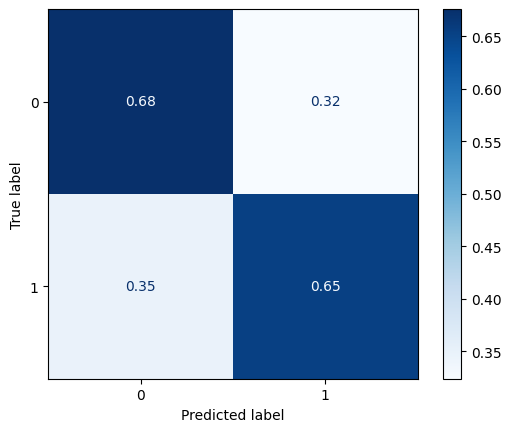

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56554
           1       0.15      0.65      0.24      4949

    accuracy                           0.67     61503
   macro avg       0.55      0.66      0.52     61503
weighted avg       0.89      0.67      0.75     61503



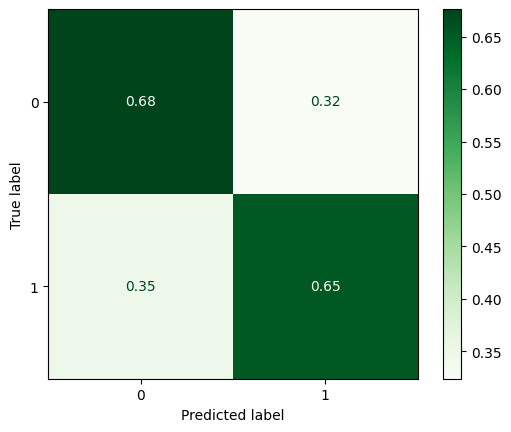

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg Balc w Bureau,0.674133,0.674455,0.15059,0.150165,0.653653,0.653667,0.244786,0.244225,0.726003,0.725294


In [115]:
logreg_balc_results = eval_classification(logreg_balc, X_train_proc, y_train, X_val_proc, y_val, model_name = 'LogReg Balc w Bureau')

logreg_balc_results

In [116]:
test_data = pd.read_csv('test_final.csv')

In [117]:
# test_data['Unnamed: 0']

In [118]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MOST_RECENT,DAYS_CREDIT_REC,MONTHS_BALANCE,STATUS,SK_ID_PREV,PREV_NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PREV_APP_COUNT,PREV_APP_BINS
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5896634.0,Active,currency 1,-559.0,0.0,0.0,0.0,Consumer credit,-6.0,26-50,-49.0,0.0,1,1369693.0,Consumer loans,24835.5,FRIDAY,13.0,Y,1.0,XAP,Approved,-1740.0,Cash through the bank,XAP,Refreshed,Mobile,POS,XNA,Country-wide,23.0,Connectivity,high,1.0,0-10
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [119]:
id_col = test_data.loc[:,'SK_ID_CURR']
id_col = pd.DataFrame(id_col)

In [120]:
test_proc = main_pipe.transform(test_data)
test_proc.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_ANNUITY,EXT_SOURCE_2,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,DAYS_CREDIT_REC,MONTHS_BALANCE,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,PREV_APP_COUNT,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_other,CREDIT_TYPE_Business Loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Microloan,CREDIT_TYPE_Real Estate,CREDIT_TYPE_Unknown,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,CHANNEL_TYPE_AP+ (Cash loan),CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,CHANNEL_TYPE_Country-wide,CHANNEL_TYPE_Credit and cash offices,CHANNEL_TYPE_Regional / Local,CHANNEL_TYPE

In [121]:
test_pred = logreg_balc.predict_proba(test_proc)[:,1]
test_pred = pd.DataFrame(test_pred)

In [122]:
test_pred.head()

,0
0,0.394411
1,0.728105
2,0.269014
3,0.470924
4,0.630377


In [123]:
logreg_balc_submit = id_col.join(test_pred)
logreg_balc_submit.columns = ['SK_ID_CURR', 'TARGET']
logreg_balc_submit

,SK_ID_CURR,TARGET
0,100001,0.394411
1,100005,0.728105
2,100013,0.269014
3,100028,0.470924
4,100038,0.630377
...,...,...
48739,456221,0.364725
48740,456222,0.434587
48741,456223,0.338979
48742,456224,0.562725


In [124]:
logreg_balc_submit.to_csv('LRBalc5_prev.csv', index=False)

In [125]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [126]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()

# knn_pipe = make_imb_pipeline(SMOTE(random_state=42), knn)


# # knn_pipe.fit(X_train_)

# knn_results = eval_classification(knn_pipe, X_train_proc, y_train, X_val_proc, y_val, model_name='KNN No Tuning', results_frame=logreg_balc_results)

# # knn_results

In [127]:
# knn_results

Model is overfitting

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_pipe = make_imb_pipeline(dt).fit(X_train_proc, y_train)


Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



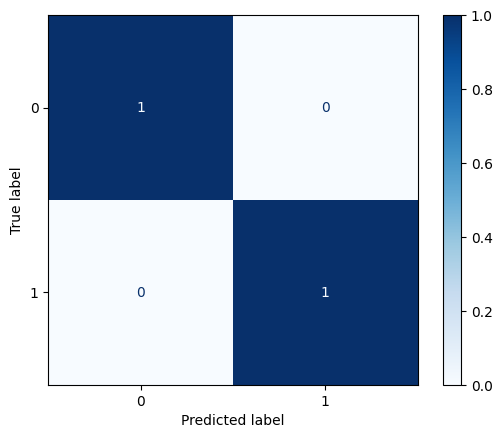

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56554
           1       0.13      0.14      0.14      4949

    accuracy                           0.85     61503
   macro avg       0.53      0.53      0.53     61503
weighted avg       0.86      0.85      0.86     61503



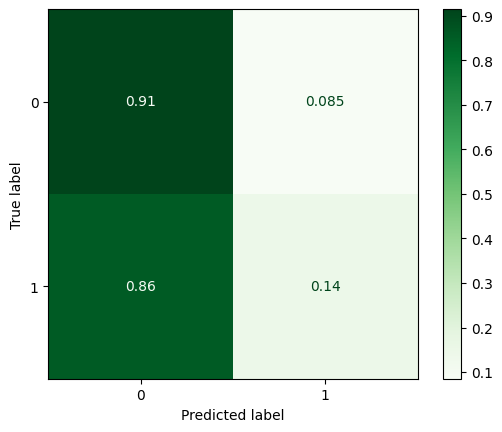

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg Balc w Bureau,0.674133,0.674455,0.15059,0.150165,0.653653,0.653667,0.244786,0.244225,0.726003,0.725294
DT No Tuning,1.000000,0.852853,1.00000,0.129003,1.000000,0.144070,1.000000,0.136121,1.000000,0.529474


In [130]:

dt_results = eval_classification(dt_pipe, X_train_proc, y_train, X_val_proc, y_val, model_name='DT No Tuning', results_frame=logreg_balc_results)
dt_results

In [131]:
dt.get_depth()

90

Decision Tree is also overfitting

In [132]:
from sklearn.model_selection  import GridSearchCV


In [133]:
params = {'decisiontreeclassifier__max_depth' : range(2, 20)}

dt_gs = GridSearchCV(dt_pipe, param_grid=params, n_jobs =8, cv=3, verbose =1, scoring = 'roc_auc').fit(X_train_proc, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [134]:
dt_gs.best_params_

{'decisiontreeclassifier__max_depth': 6}

In [135]:
best_depth_dt = dt_gs.best_estimator_

Train Evaluation
              precision    recall  f1-score   support

           0       0.95      0.66      0.78    226132
           1       0.14      0.62      0.22     19876

    accuracy                           0.65    246008
   macro avg       0.54      0.64      0.50    246008
weighted avg       0.89      0.65      0.73    246008



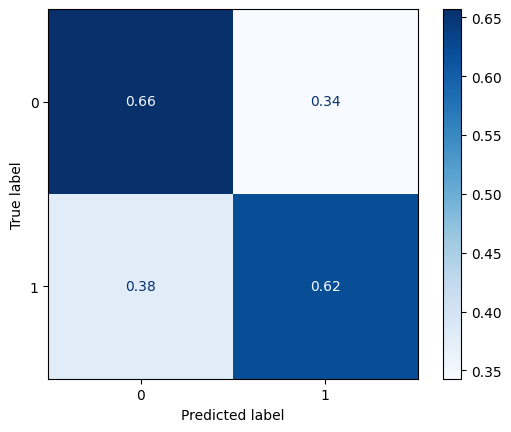

Test Evaluation
              precision    recall  f1-score   support

           0       0.95      0.65      0.78     56554
           1       0.14      0.62      0.22      4949

    accuracy                           0.65     61503
   macro avg       0.54      0.64      0.50     61503
weighted avg       0.89      0.65      0.73     61503



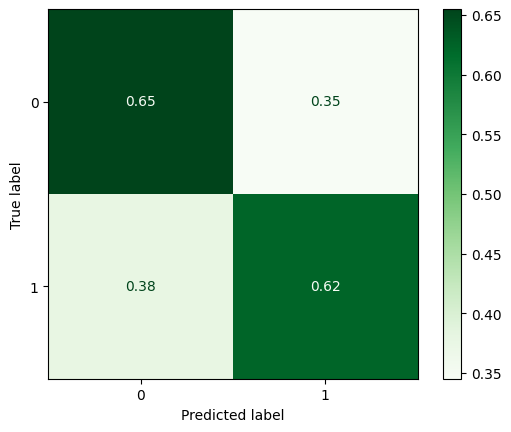

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg Balc w Bureau,0.674133,0.674455,0.150590,0.150165,0.653653,0.653667,0.244786,0.244225,0.726003,0.725294
DT No Tuning,1.000000,0.852853,1.000000,0.129003,1.000000,0.144070,1.000000,0.136121,1.000000,0.529474
DT Depth 6,0.654170,0.652293,0.137365,0.136372,0.621302,0.622752,0.224987,0.223747,0.691546,0.686638


In [136]:
best_dt_results = eval_classification(best_depth_dt, X_train_proc, y_train, X_val_proc, y_val, model_name='DT Depth 6', results_frame=dt_results)
best_dt_results

In [137]:
logreg_balc_submit.to_csv('preds.csv', index=False)

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [140]:
rf.fit(X_train_proc, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008



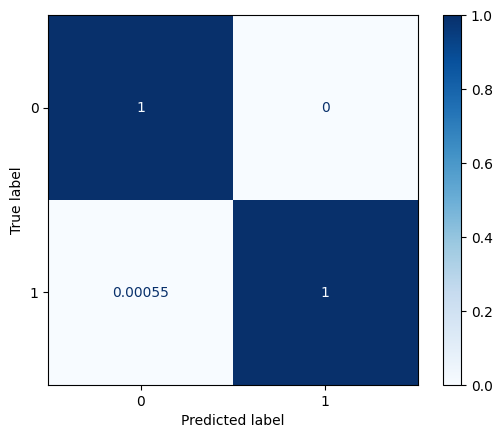

Test Evaluation
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



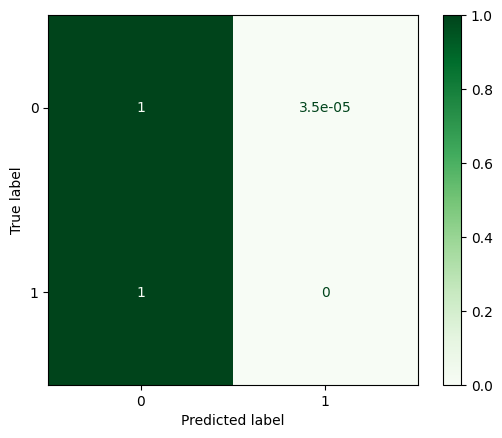

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg Balc w Bureau,0.674133,0.674455,0.150590,0.150165,0.653653,0.653667,0.244786,0.244225,0.726003,0.725294
DT No Tuning,1.000000,0.852853,1.000000,0.129003,1.000000,0.144070,1.000000,0.136121,1.000000,0.529474
DT Depth 6,0.654170,0.652293,0.137365,0.136372,0.621302,0.622752,0.224987,0.223747,0.691546,0.686638
RF Balanced Class,0.999955,0.919500,1.000000,0.000000,0.999447,0.000000,0.999723,0.000000,1.000000,0.705716


In [141]:
rf_balc_results = eval_classification(rf, X_train_proc, y_train, X_val_proc, y_val, model_name='RF Balanced Class', results_frame=best_dt_results)
rf_balc_results

In [142]:
estimators =  rf.estimators_

estimators[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [143]:
estimators[0].get_depth()

66

In [144]:
depths = [est.get_depth() for est in estimators]
max(depths)

83

In [145]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [146]:
rf_pipe = make_imb_pipeline(rf)

In [147]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('randomforestclassifier',
   RandomForestClassifier(class_weight='balanced', random_state=42))],
 'transform_input': None,
 'verbose': False,
 'randomforestclassifier': RandomForestClassifier(class_weight='balanced', random_state=42),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__monotonic_cst': None,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestcla

In [148]:
params = {'randomforestclassifier__max_depth' : range(1, 80, 10)}

rf_gs = GridSearchCV(rf_pipe, param_grid=params, n_jobs =8, cv=3, verbose =1, scoring = 'roc_auc').fit(X_train_proc, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [149]:
rf_gs.best_params_

{'randomforestclassifier__max_depth': 11}

In [150]:
rf_best_depth = rf_gs.best_estimator_

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.75      0.84    226132
           1       0.19      0.69      0.30     19876

    accuracy                           0.74    246008
   macro avg       0.58      0.72      0.57    246008
weighted avg       0.90      0.74      0.80    246008



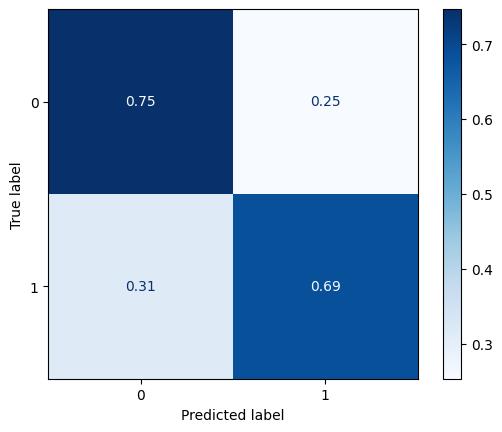

Test Evaluation
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     56554
           1       0.16      0.57      0.25      4949

    accuracy                           0.72     61503
   macro avg       0.56      0.65      0.54     61503
weighted avg       0.89      0.72      0.78     61503



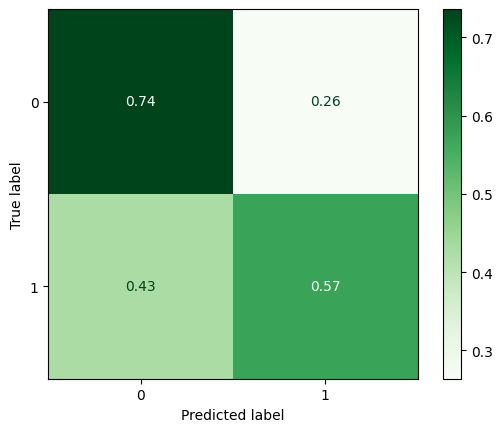

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg Balc w Bureau,0.674133,0.674455,0.150590,0.150165,0.653653,0.653667,0.244786,0.244225,0.726003,0.725294
DT No Tuning,1.000000,0.852853,1.000000,0.129003,1.000000,0.144070,1.000000,0.136121,1.000000,0.529474
DT Depth 6,0.654170,0.652293,0.137365,0.136372,0.621302,0.622752,0.224987,0.223747,0.691546,0.686638
RF Balanced Class,0.999955,0.919500,1.000000,0.000000,0.999447,0.000000,0.999723,0.000000,1.000000,0.705716
RF 11 depth,0.741956,0.723038,0.192364,0.159597,0.685903,0.572439,0.300462,0.249604,0.795107,0.715303


In [151]:
rf_11 = eval_classification(rf_best_depth, X_train_proc, y_train, X_val_proc, y_val, model_name='RF 11 depth', results_frame=rf_balc_results)
rf_11

In [152]:
rf_pred = rf_best_depth.predict_proba(test_proc)[:,1]
rf_pred = pd.DataFrame(rf_pred)

In [153]:
rf_pred_submit = id_col.join(rf_pred)
rf_pred_submit.columns = ['SK_ID_CURR', 'TARGET']
rf_pred_submit

,SK_ID_CURR,TARGET
0,100001,0.382294
1,100005,0.624456
2,100013,0.299360
3,100028,0.496487
4,100038,0.629417
...,...,...
48739,456221,0.381686
48740,456222,0.507642
48741,456223,0.433218
48742,456224,0.473911


In [154]:
rf_pred_submit.to_csv('rf_preds.csv', index=False)